In [149]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [150]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

## Hints!

In [151]:
options(repr.plot.width = 8, repr.plot.height = 7)

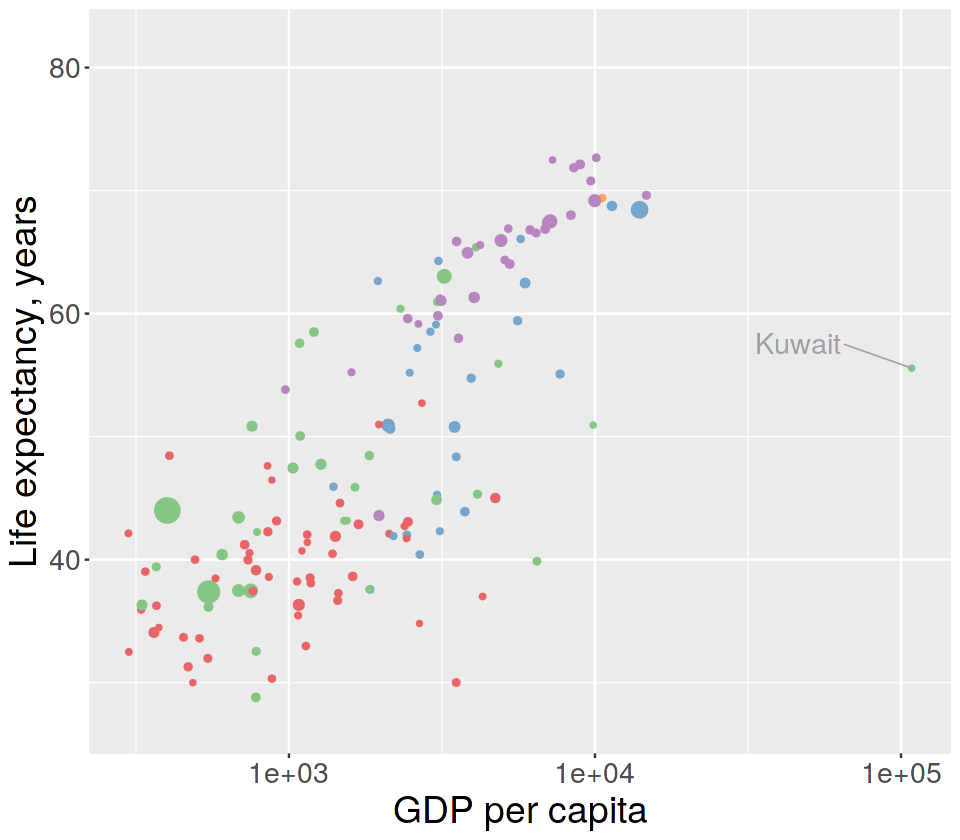

In [152]:
# prepare 1952 geom


# color points by continent and size points by population
p1952 = ggplot(df.1952, aes(x = gdpPercap, y = lifeExp, color=continent, size=pop))
p1952 = p1952 + geom_point()


# set scales like in the example
p1952 = p1952 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)



# fix the y-axis by setting a range
p1952 = p1952 + ylim(c(27, 82))



# set the x-axis to a log-scale
p1952 = p1952 + scale_x_continuous(trans='log10', labels = scales::scientific)



# customize the x axis and y axis labels
p1952 = p1952 + labs(x = "GDP per capita", y = "Life expectancy, years")


# add label for Kuwait with repel
p1952 = p1952 + geom_text_repel(data = df.1952.kuwait, 
                        aes(label = country), size= 6, segment.size = 0.35, 
                                color = 'gray63', segment.colour = 'gray63',  nudge_x = -0.37, nudge_y = 2)






# color scale manually
# get rgb values then convert to hex

#                Red   Green   Blue

# Africa        233    100      102    #E96466
# Americas      119   166       204    #77A6CC
# Asia          134   198       132    #86C684  
# Europe        183   134       190    #B786BE
# Oceania       250   166       084    #FAA654



# add colors for points
p1952 = p1952 + scale_color_manual(values = c('#E96466',
                                      '#77A6CC',
                                      '#86C684',
                                      '#B786BE',
                                      '#FAA654'))




# increase axis titles

p1952 = p1952 + theme(axis.title.y = element_text(size = rel(2.0), angle = 90))
p1952 = p1952 + theme(axis.title.x = element_text(size = rel(2.0), angle = 0))



# increase size of the text on the labels
p1952 = p1952 + theme(axis.text.x = element_text(size = rel(1.9), angle = 0))
p1952 = p1952 + theme(axis.text.y = element_text(size = rel(1.9), angle = 0))





# remove legend for this plot so both plots don't have a legend
p1952 = p1952 + theme(legend.position = 'none')



p1952

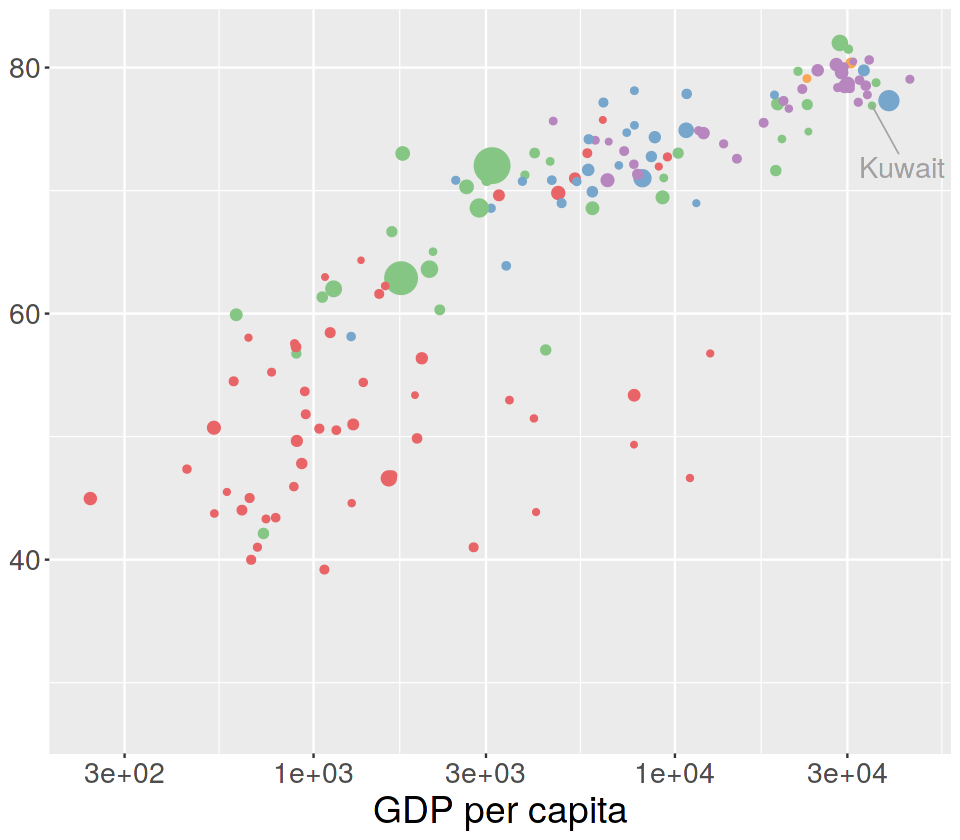

In [153]:
# prepare 2002 geom


# color points by continent and size points by population
p2002 = ggplot(df.2002, aes(x = gdpPercap, y = lifeExp, color=continent, size=pop))
p2002 = p2002 + geom_point()




# set scales like in the example
p2002 = p2002 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)




# fix the y-axis by setting a range
p2002 = p2002 + ylim(c(27, 82))



# set the x-axis to a log-scale
p2002 = p2002 + scale_x_continuous(trans='log10', labels = scales::scientific)


# add colors for points
p2002 = p2002 + scale_color_manual(values = c('#E96466',
                                      '#77A6CC',
                                      '#86C684',
                                      '#B786BE',
                                      '#FAA654'))



# add label for Kuwait with repel
p2002 = p2002 + geom_text_repel(data = df.2002.kuwait, 
                        aes(label = df.2002.kuwait$country), size = 6, segment.size = 0.35, 
                                color = 'gray63', segment.colour = 'gray63', nudge_x = 0.5, 
                                nudge_y = -5)




# color scale manually
# get rgb values then convert to hex

#                Red   Green   Blue

# Africa        233    100      102    #E96466
# Americas      119   166       204    #77A6CC
# Asia          134   198       132    #86C684  
# Europe        183   134       190    #B786BE
# Oceania       250   166       084    #FAA654



# customize the x axis and y axis labels
# set y axis label for this plot to be empty
p2002 = p2002 + theme(axis.title.x = element_text(size = rel(2.0), angle = 0))
p2002 = p2002 + theme(legend.position = 'none', axis.title.y = element_blank())
p2002 = p2002 + labs(x = "GDP per capita")


# increase size of the text on the labels
p2002 = p2002 + theme(axis.text.x = element_text(size = rel(1.9), angle = 0))
p2002 = p2002 + theme(axis.text.y = element_text(size = rel(1.9), angle = 0))




p2002

In [154]:
min(df.1952$gdpPercap)
min(df.2002$gdpPercap)


max(df.1952$gdpPercap)
max(df.2002$gdpPercap)

[1] 298.8462

[1] 241.1659

[1] 108382.4

[1] 44683.98

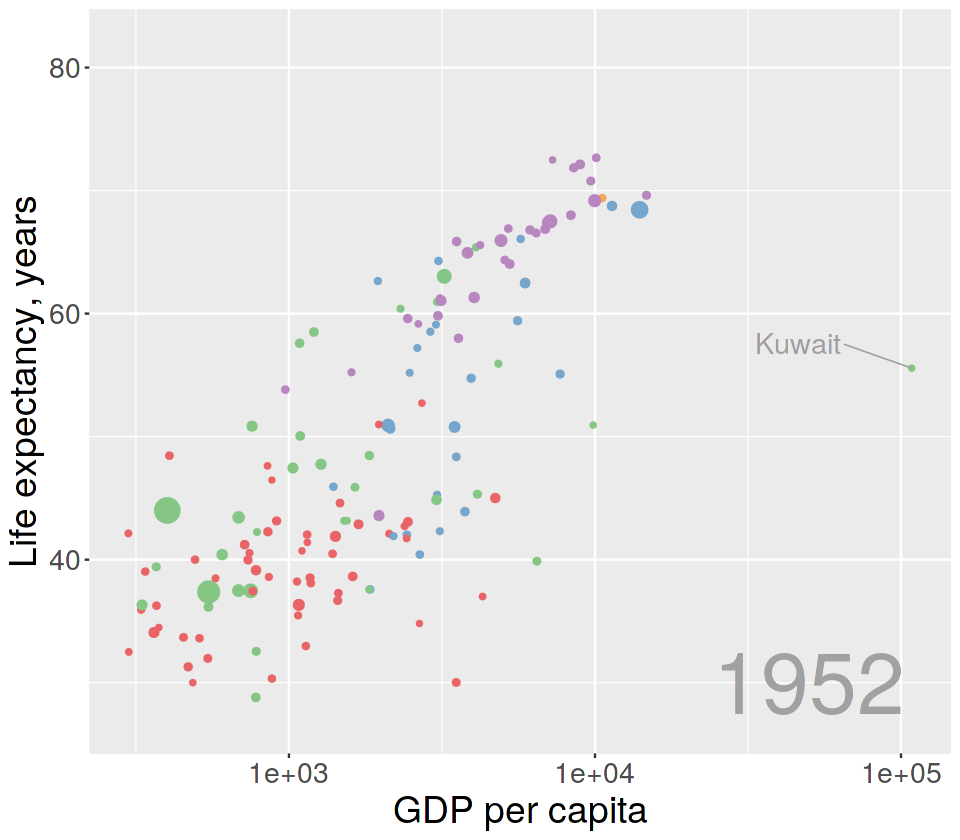

In [155]:
# annotate the 1952 plot with year
p1952 = p1952 + annotate(geom="text", x=50000, y=30, label="1952", size=18,
              color="gray63")
p1952

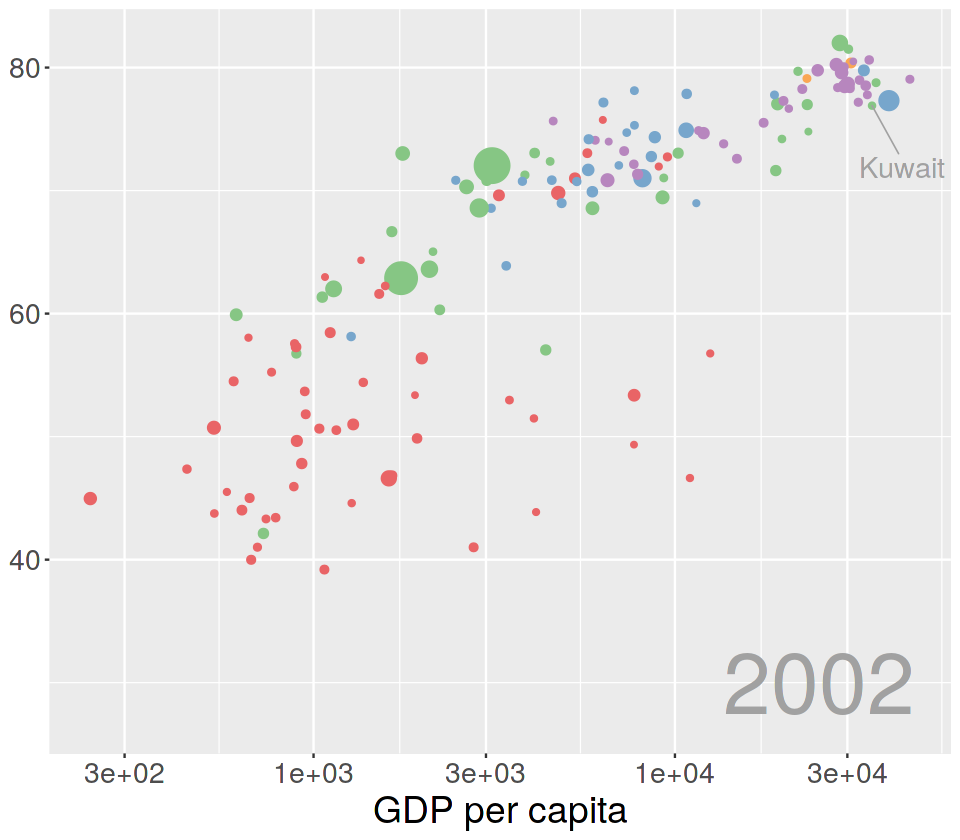

In [156]:
# annotate the 2002 plot with year
p2002 = p2002 + annotate(geom="text", x=25000, y=30, label="2002", size=18,
              color="gray63")
p2002

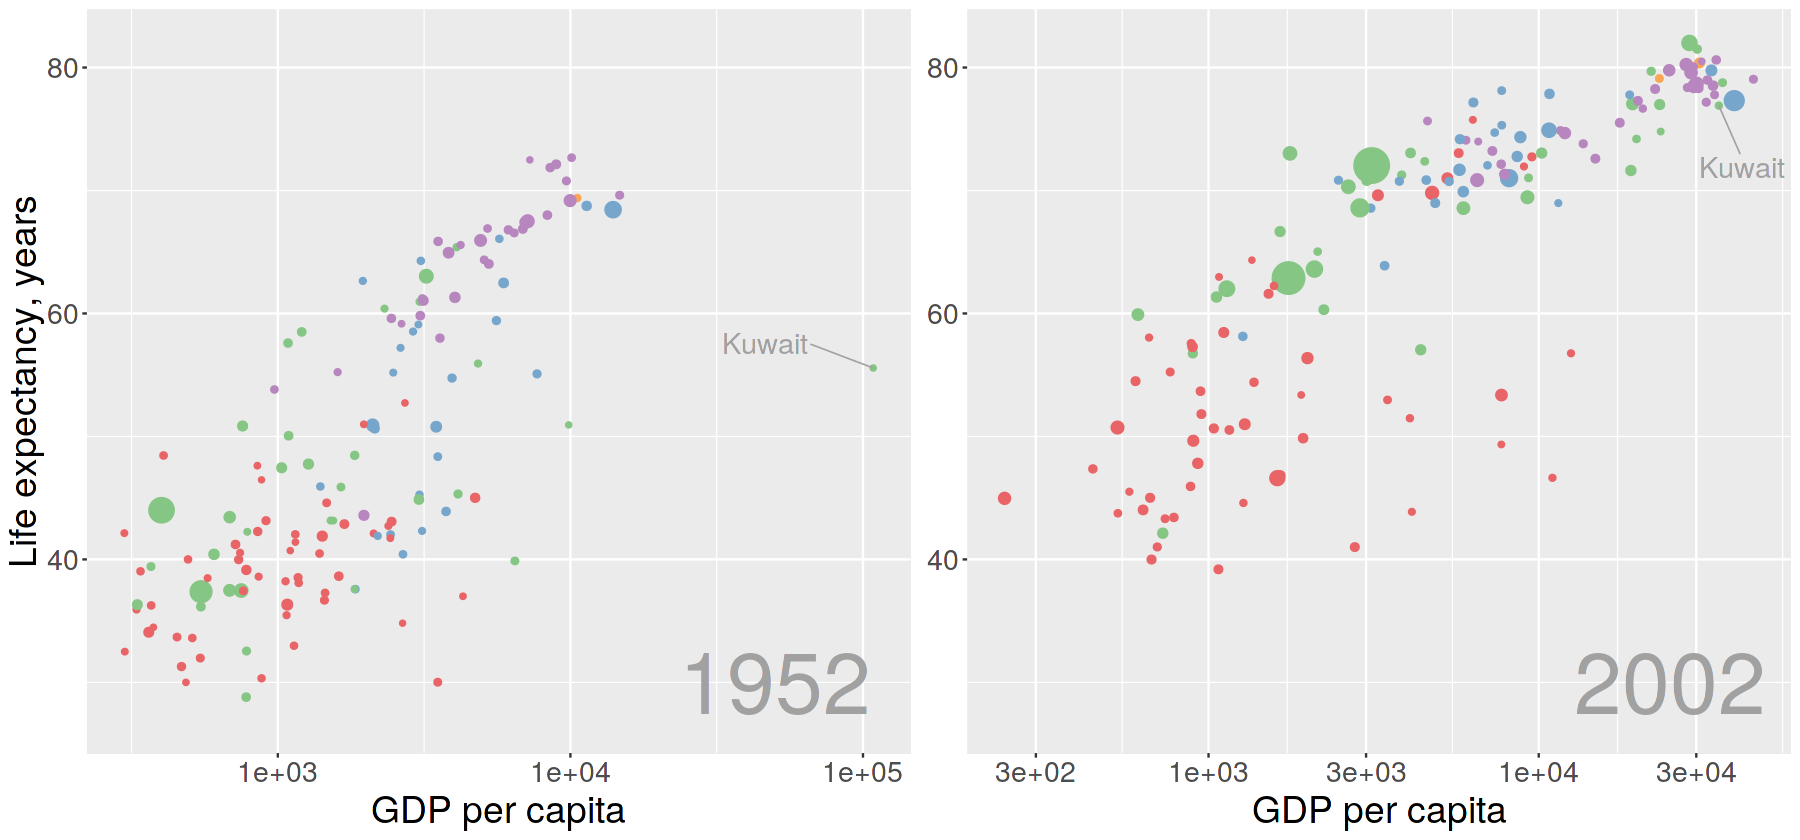

In [157]:
options(repr.plot.width = 15, repr.plot.height = 7)
combinedp = p1952 + p2002
combinedp

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!